1. Hurricanes per Year

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?

-Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
-Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.
Hint: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import math

observed_hurricanes = 12  # threshold for thix example
historic_average = 6.3

lmbda = historic_average

def poisson_pmf(k, lmbda):
    return math.exp(-lmbda + k * math.log(lmbda) - math.lgamma(k + 1))

probability_greater_than_15 = sum(poisson_pmf(k, lmbda) for k in range(observed_hurricanes, 10000))
# Since in practice it is not possible to calculate an infinite sum, this upper limit is determined. (poisson=infinite sum, upper limit=1000)

significance_level = 0.022
if probability_greater_than_15 < significance_level:
    print("The number of hurricanes in 2005 is significantly larger than the historic average.")
else:
    print("The number of hurricanes in 2005 is not significantly larger than the historic average.")


The number of hurricanes in 2005 is not significantly larger than the historic average.


2. Pairwise t-test

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
Determine whether the change in blood pressures within our sample was statistically significant.

Hint: in this case, the Student's 
-test should be performed to compare the two datasets. Use the following test statistics:

T = (x1-x2)/ (a*(2/n)^(1/2))
a = ((a1^2+a2^2)/2)^(1/2)

In [2]:
import numpy as np
from scipy.stats import t

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

differences = post - pre  # [20 24 25 20  2 20 17  7 17 35]

mean_difference = np.mean(differences)  # 18.7

std_difference = np.std(differences, ddof=1)  # 9.189970378382922

n = len(differences)  # 10
sem_difference = std_difference / np.sqrt(n)  # 2.9061238025169462

t_statistic = mean_difference / sem_difference  # 6.4346880142560465

# Degrees of freedom
df = n - 1  # 9

alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df)  # 2.2621571627409915

print("Mean difference:", mean_difference)
print("Standard error of the mean difference:", sem_difference)
print("t statistic:", t_statistic)
print("Critical t value (two-tailed) at alpha = 0.05:", t_critical)

if np.abs(t_statistic) > t_critical:
    print("The change in blood pressures within the sample is statistically significant (reject the null hypothesis).")
else:
    print("The change in blood pressures within the sample is not statistically significant (fail to reject the null hypothesis).")
# Looking at the results, we understand that exposure to halogen lighting for 20 minutes increases systolic blood pressure.

Mean difference: 18.7
Standard error of the mean difference: 2.9061238025169462
t statistic: 6.4346880142560465
Critical t value (two-tailed) at alpha = 0.05: 2.2621571627409915
The change in blood pressures within the sample is statistically significant (reject the null hypothesis).


3. Curve fitting of temperature in Alaska

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max: 17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

-Plot these temperatures.
-Find a suitable a function that can describe min and max temperatures.
-Fit this function to the data with scipy.optimize.curve_fit().
-Plot the result. Is the fit reasonable? If not, why?
-Is the time offset for min and max temperatures the same within the fit accuracy?

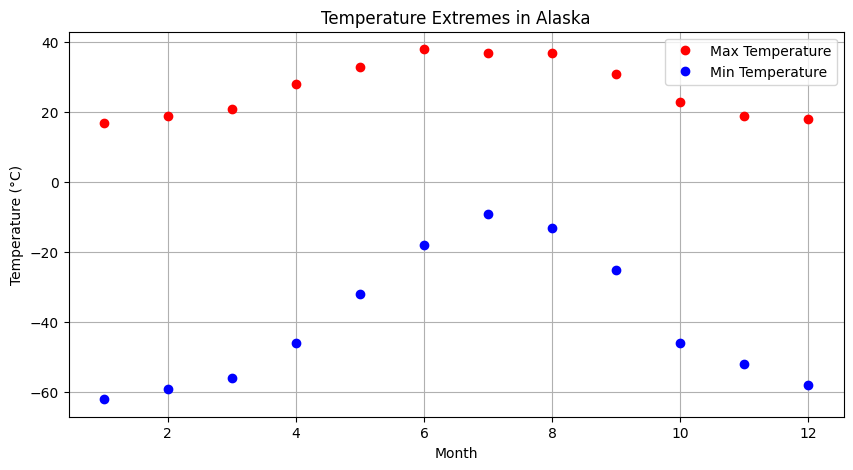

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

months = np.arange(1, 13)
max_temp = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_temp = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

plt.figure(figsize=(10, 5))
plt.plot(months, max_temp, 'ro', label='Max Temperature')
plt.plot(months, min_temp, 'bo', label='Min Temperature')
plt.xlabel('Month');plt.ylabel('Temperature (°C)');plt.title('Temperature Extremes in Alaska')
plt.legend();plt.grid(True);plt.show()


In [4]:
max_temp_np = np.array(max_temp)
min_temp_np = np.array(min_temp)
difference = max_temp_np - min_temp_np
print(difference)


[79 78 77 74 65 56 46 50 56 69 71 76]


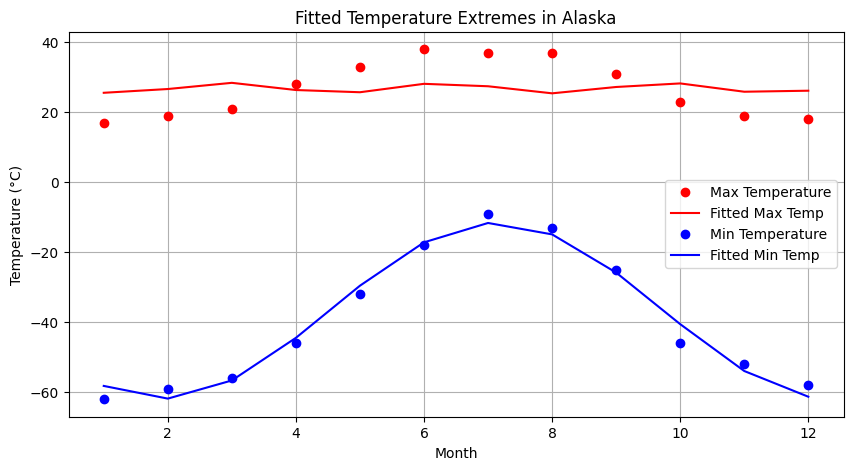

In [5]:
# We need to find a function to fit both data. The graph below is very similar to the sin graph. We can say that the above graph is a very 
# low amplitude of the sin graph. a: Amplitude, b: Frequency, c: Phase shift, d: Y-axis shift

def sinusoidal(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

popt_max, pcov_max = curve_fit(sinusoidal, months, max_temp)
popt_min, pcov_min = curve_fit(sinusoidal, months, min_temp)

plt.figure(figsize=(10, 5))
plt.plot(months, max_temp, 'ro', label='Max Temperature')
plt.plot(months, sinusoidal(months, *popt_max), 'r-', label='Fitted Max Temp')
plt.plot(months, min_temp, 'bo', label='Min Temperature')
plt.plot(months, sinusoidal(months, *popt_min), 'b-', label='Fitted Min Temp')
plt.xlabel('Month');plt.ylabel('Temperature (°C)');plt.title('Fitted Temperature Extremes in Alaska')
plt.legend();plt.grid(True);plt.show()


In [6]:
print("Parameters for Max Temperature Fit:", popt_max)
print("Covariance Matrix for Max Temperature Fit:", pcov_max)

print("Parameters for Min Temperature Fit:", popt_min)
print("Covariance Matrix for Min Temperature Fit:", pcov_min)

# When we look at the graph, Fitted parameters and covariance matrices, we see that the sinusoidal model fits well for the minimum but not very 
# well for the maximum. We already expected this, we made this assumption at first, we thought we could explain it with a sine function with low 
# amplitude.

# Although the graphics are generally good, they are sometimes close and sometimes far away at some points. For this example the number of data 
# is small and a better graph is not needed to avoid overfitting.

Parameters for Max Temperature Fit: [ 1.5043517  -1.85067707 19.59027091 26.89935734]
Covariance Matrix for Max Temperature Fit: [[ 1.58021209e+01 -3.50811364e-01  2.54521739e+00  1.52647787e+00]
 [-3.50811364e-01  5.49453432e-01 -3.72513381e+00  4.29664930e-02]
 [ 2.54521739e+00 -3.72513381e+00  3.18052200e+01  2.08166721e-02]
 [ 1.52647787e+00  4.29664930e-02  2.08166721e-02  7.68367805e+00]]
Parameters for Min Temperature Fit: [ 25.14962     -5.68186441  47.54705993 -36.71256604]
Covariance Matrix for Min Temperature Fit: [[ 1.72807268e+00 -2.48091216e-04 -3.66509611e-03  1.89193011e-01]
 [-2.48091216e-04  5.30713805e-04 -3.55962208e-03  1.60002139e-02]
 [-3.66509611e-03 -3.55962208e-03  2.70519169e-02 -1.04188020e-01]
 [ 1.89193011e-01  1.60002139e-02 -1.04188020e-01  1.41859566e+00]]


4. Fit the residues

Read the residuals_261.pkl file. 
The feature named residual contains the residuals (defined as yi-y'i) of a linear regression as a function of the independent variable distances.

Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
Set the appropriate Poisson uncertainty for each bin (thus, for each bin, ai = (ni)^(1/2), where ni is the number of entries in each bin)
By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
Perform the X^2 goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

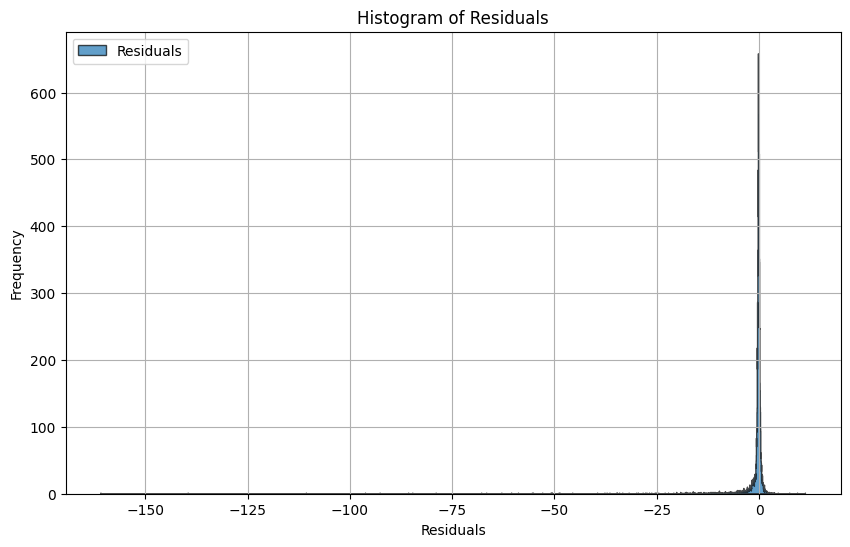

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare

residuals_data = np.load("residuals_261.pkl", allow_pickle=True)

# print(residuals_data)
# print(residuals_data.shape)
# print(type(residuals_data))
# print(residuals_data.size)
# residuals_data_list = residuals_data.tolist()
# print(residuals_data_list)
# print(len(residuals_data_list))  # Liste uzunluğu
# print(residuals_data_list.keys())  # Anahtarları yazdırır
# print(residuals_data_list.values())  # Değerleri yazdırır
# print(residuals_data_list['residuals'])
# print(residuals_data_list['distances'])
# residuals_data_dict = {'residuals':residuals_data_list['residuals'], 'distances':residuals_data_list['distances']}
# print(residuals_data_dict)
# residuals_data = residuals_data_dict

residuals_data = residuals_data.tolist()

residuals = residuals_data['residuals']

hist, bin_edges = np.histogram(residuals, bins='auto')

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=bin_edges, alpha=0.7, label='Residuals', edgecolor='black', histtype='stepfilled')
plt.xlabel('Residuals');plt.ylabel('Frequency');plt.title('Histogram of Residuals')
plt.legend();plt.grid(True);plt.show()


In [8]:
# Poisson uncertainty for each bin
errors = np.sqrt(hist)

def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Fit the defined function to the histogram
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
popt, pcov = curve_fit(gaussian, bin_centers, hist, sigma=errors, absolute_sigma=True)

print(errors)
print(bin_centers)
print(popt)
print(pcov)
print(errors.shape)
print(bin_centers.shape)
print(popt.shape)
print(pcov.shape)

[1. 0. 0. ... 0. 0. 1.]
[-160.832535   -160.79760499 -160.76267498 ...   11.23267498   11.26760499
   11.302535  ]
[1. 1. 1.]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
(4929,)
(4929,)
(3,)
(3, 3)


C:\Users\oguzh\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:931: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
C:\Users\oguzh\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:526: RuntimeWarning: invalid value encountered in multiply
  return transform * (func(xdata, *params) - ydata)
C:\Users\oguzh\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [9]:
# Calculate expected frequencies using the fitted function
expected = gaussian(bin_centers, *popt)

# X^2 goodness-of-fit test
#chi_squared, p_value = chisquare(hist, f_exp=expected)
#chi_squared, p_value = chisquare(hist, f_exp=gaussian(bin_centers, *popt), ddof=len(popt))

print(expected)
# print(chi_squared)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.83242178e-23
 1.28094875e-23 8.94351376e-24]


5. Temperatures in Munich

Get the following data file:

https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
which gives the temperature in Munich every day for several years.

Fit the following function to the data:
f(t) = a*cos(2*pi*t+b) + c

where t is the time in years.

Make a plot of the data and the best-fit model in the range 2008 to 2012.

What are the best-fit values of the parameters and thier uncertainties?

What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

What is the meaning of the b parameter, and what physical sense does it have? Describe it with a comment in the code.

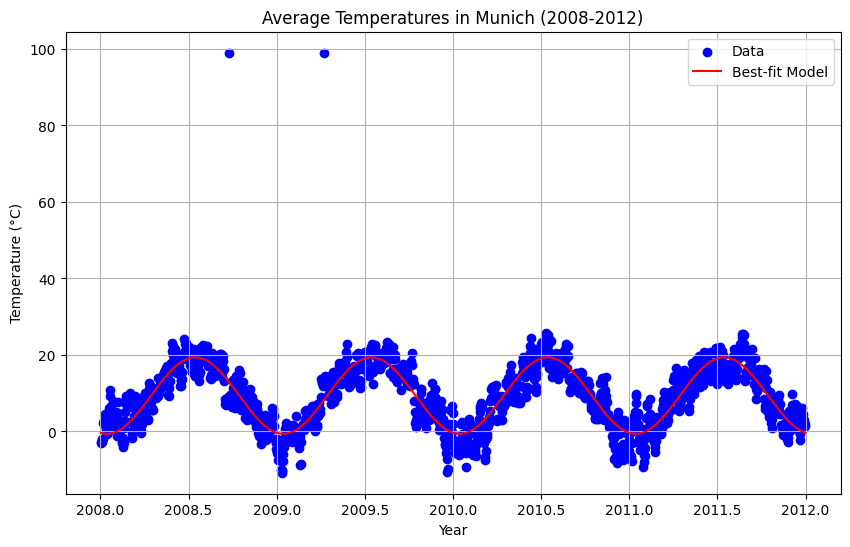

Best-fit parameters:
a: -9.988133689134516
b: 12.333023014196588
c: 9.38411486809072
Uncertainties:
a: 0.17961047334210886
b: 0.01798305242276112
c: 0.12700529122712614
Overall average temperature in Munich: 9.384097734976043
Predicted coldest temperature: -0.6037388871173217
Predicted hottest temperature: 19.372195568442635


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt("munich_temperatures_average_with_bad_data.txt")

years = data[:, 0]
temperatures = data[:, 1]

def model(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

mask = (years >= 2008) & (years <= 2012)
years_filtered = years[mask]
temperatures_filtered = temperatures[mask]

popt, pcov = curve_fit(model, years_filtered, temperatures_filtered)

predictions = model(years_filtered, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(years_filtered, temperatures_filtered, label='Data', color='blue')
plt.plot(years_filtered, predictions, label='Best-fit Model', color='red')
plt.xlabel('Year');plt.ylabel('Temperature (°C)');plt.title('Average Temperatures in Munich (2008-2012)')
plt.legend();plt.grid(True);plt.show()

print("Best-fit parameters:")
print("a:", popt[0]);print("b:", popt[1]);print("c:", popt[2])
print("Uncertainties:")
print("a:", np.sqrt(pcov[0, 0]));print("b:", np.sqrt(pcov[1, 1]));print("c:", np.sqrt(pcov[2, 2]))

overall_average_temperature = np.mean(temperatures_filtered)
coldest_temperature = np.min(predictions)
hottest_temperature = np.max(predictions)
print("Overall average temperature in Munich:", overall_average_temperature)
print("Predicted coldest temperature:", coldest_temperature)
print("Predicted hottest temperature:", hottest_temperature)

# b phase shift. It determines the time at which the cosine function reaches its maximum value. b indicates the time of year 
# when the temperature peaks or bottoms out.